In [0]:
#importing Necessary libraries
import warnings 
warnings.filterwarnings("ignore")
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras import backend as K


Using TensorFlow backend.


In [0]:
# Relu Used For Our CNN Implementation in Verilog, For more info go to Keras Relu with alpha and threshold....documentation 
def relu_advanced(x):
    return K.relu(x, max_value=25,alpha = 1.0, threshold= 2.0)

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()  # Loading Dataset

170500096/170498071 [==============================] - 68s 0us/step


In [0]:
type(train_images),train_images.ndim,train_images.shape,train_labels.shape  #Checking the type of the ImageArray

(numpy.ndarray, 4, (50000, 32, 32, 3), (50000, 1))

In [0]:
#Converting Images To one channel Gray Scale.....

train_images = tf.image.rgb_to_grayscale(
    train_images,
    name=None
)
test_images = tf.image.rgb_to_grayscale(
    test_images,
    name=None
)

In [0]:
type(train_images)   # Checking the Type of the Images array

tensorflow.python.framework.ops.Tensor

In [0]:
train_images = tf.Session().run(train_images)
test_images = tf.Session().run(test_images)   #Converting Image Array Tensors to Numpy nDim Array

In [0]:
train_images.shape,test_images.shape  # Printing the shape of the train and test images

((50000, 32, 32, 1), (10000, 32, 32, 1))

In [0]:
train_images_show = train_images[:, :, :,0]  # Image array extraction for Showing in next Cell
test_images_show = test_images[:, :, :,0]

In [0]:
train_images.shape,test_images.shape,train_images_show.shape,test_images_show.shape  # All Dataset Divison Images Array and labels Array Shape

((50000, 32, 32, 1), (10000, 32, 32, 1), (50000, 32, 32), (10000, 32, 32))

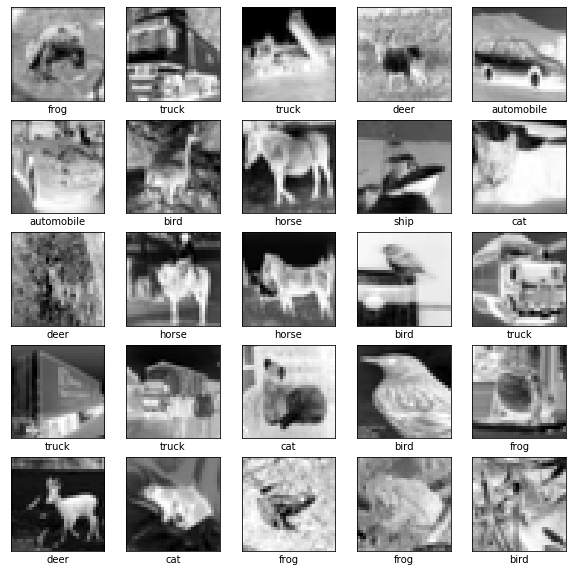

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_show[i], cmap=plt.cm.binary)     #Showing the Extracted Images with Labels stored in class_names Array.....
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])            
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(5, (3, 3), activation = relu_advanced, input_shape=(32, 32, 1)))    # Adding A layer with 5 filters and With Actiation relu_advanced defined by us .... above
model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(1, (3, 3), activation = relu_advanced))                     #  Examples of further addition of convolutional Layers
#model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(32, 32, 1)))      
# model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64, (3, 3),padding = 'same', activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))

In [0]:
model.summary()   #Printing Dimensions and Layers of The Added Layers.....

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 5)         50        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 5)         0         
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())     # Producing Fully Connected Neural Network With Activation Function Applied to below Dense Layer(Hidden Layer).....
model.add(layers.Dense(100,activation = relu_advanced))  # Here also Activation Function is Our Defined Function .....
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 5)         50        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 5)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1125)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               112600    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 113,660
Trainable params: 113,660
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])     # Optimizing the Model Parameters by using 'adam' Optimizer and doing all in iterations...

history = model.fit(train_images, train_labels, epochs = 5,  # A full Feed Forward + Back Propagation is collectiiely called as one epoch ..... Here 5 Epochs are taken .. 10 Are recommended.                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 28s 569us/sample - loss: 4.7955 - acc: 0.2706 - val_loss: 2.0279 - val_acc: 0.3546
Epoch 2/5
50000/50000 [==============================] - 29s 586us/sample - loss: 2.0235 - acc: 0.3492 - val_loss: 1.8559 - val_acc: 0.3777
Epoch 3/5
50000/50000 [==============================] - 29s 576us/sample - loss: 1.8569 - acc: 0.3768 - val_loss: 1.9432 - val_acc: 0.3831
Epoch 4/5
50000/50000 [==============================] - 29s 583us/sample - loss: 1.7775 - acc: 0.3990 - val_loss: 1.8946 - val_acc: 0.3882
Epoch 5/5
50000/50000 [==============================] - 29s 577us/sample - loss: 1.7514 - acc: 0.4100 - val_loss: 1.7306 - val_acc: 0.4114


10000/10000 - 2s - loss: 1.7306 - acc: 0.4114


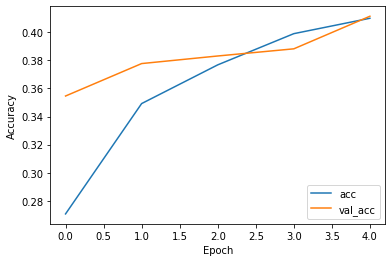

In [0]:
# Accuracy --> It is the Accuracy predicted using Train Dataset while optimizing the network
# Validation Accuracy --> It is the Accuracy predicted using Test Dataset while optimizing the network

# Accuracy --> High And Validation Accuracy --> High means Model is overfitting in Train Data Only. So, Validation Accuracy matters alongwith the Accuracy of the Model.


plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)    #Plotting Accuracy and Validation Accuracy

In [0]:
# Extracting Model Parameters Shapes using model.get_weights() method.


((model.get_weights())[0]).shape,((model.get_weights())[1]).shape,((model.get_weights())[2]).shape ,((model.get_weights())[3]).shape ,((model.get_weights())[4]).shape,((model.get_weights())[5]).shape

((3, 3, 1, 5), (5,), (1125, 100), (100,), (100, 10), (10,))

In [0]:
#Extracting Filter with Its Biases

filters = model.get_weights()[0]
filters_bias = model.get_weights()[1]

In [0]:
filters.shape  # Filters shape

(3, 3, 1, 5)

In [0]:
# Printing Filters applied in Convolution.

for k in range(5):  # No. of Filters .....
    print('Filter'+str(k+1),end="\n--------------------\n")
    for i in range(3):              # All Filters
        for j in range(3):
            print(filters[i][j][0][k])

Filter1
--------------------
0.23247015
-0.2694154
-0.12856631
0.17169526
0.20795776
-0.066676304
0.37989104
0.26844755
0.36051545
Filter2
--------------------
0.20162648
-0.18462929
-0.038839996
-0.25955686
0.063678466
-0.08680965
0.019809442
0.119738884
0.109600075
Filter3
--------------------
-0.079022385
0.062596895
-0.012765709
0.0028210396
-0.22025919
0.053304583
0.07082079
-0.12596373
0.2532152
Filter4
--------------------
-0.08135563
0.041885447
0.017042551
-0.13672455
-0.008679931
0.15777786
-0.061473276
-0.15485725
0.15073584
Filter5
--------------------
-0.11458151
-0.09784762
0.25736699
0.0055700513
-0.041395552
-0.03801865
0.18260169
0.08445169
-0.25287417


In [0]:
print("Filter Bias -----------")
filters_bias

Filter Bias -----------


array([ 0.3773295 ,  0.19491406, -0.37575278,  0.1181977 , -0.16844454],
      dtype=float32)

In [0]:
# Extracting Weights and Biases of Trained CNN model....

W1 = model.get_weights()[2]
B1 = model.get_weights()[3]
W2 = model.get_weights()[4]
B2 = model.get_weights()[5]

In [0]:
# Writing Flattend W1 Parameters into Txt File ......

f = open("W1.txt",'w')
for i in range(100):
    for j in range(1125):
        f.write(str(W1[j][i]))
        f.write("\n")
        #print(W1[i][j])
f.close()

In [0]:
# Shape of Biases of 1st Layer .....
B1.shape

(100,)

In [0]:
# Writing Flattend B1 Parameters into Txt File ......

f = open("B1.txt",'w')
for i in range(100):
    f.write(str(B1[i]))
    f.write("\n")
    #print(B1[i])

f.close()

In [0]:
# Writing Flattend W2 Parameters into Txt File ......

f = open("W2.txt",'w')
for i in range(10):
    for j in range(100):
        f.write(str(W2[j][i]))
        f.write("\n")
        #print(W1[i][j])
f.close()

In [0]:
# Writing Flattend B2 Parameters into Txt File ......

f = open("B2.txt",'w')
for i in range(10):
    f.write(str(B2[i]))
    f.write("\n")
    #print(B1[i])

f.close()

In [0]:
# Writing All Trained_Images in a Txt File..... All Flattened For Coe File Conversion For FPGA Implementation ......
f = open('Images.txt','w')
for l in range(50000):
    for i in range(32):
        for j in range(32):
            f.write(str(train_images[l][i][j][0]))
            f.write("\n")
f.close()

KeyboardInterrupt: ignored

In [0]:
# Writing All Trained_Images_Labels in a Txt File..... All Flattened For Coe File Conversion For FPGA Implementation ......


f = open("Labels.txt","w")
for i in range(50000):
    f.write(str(train_labels[i][0]))
    f.write("\n")
f.close()

In [0]:
# Extracting 10 images of Trained_images Dataset with Label as given equals to 9

f = open('Images_9.txt','w')
count = 0
for l in range(50000):
    if train_labels[l][0] == 9 and count<10:
        for i in range(32):
            for j in range(32):
                f.write(str(train_images[l][i][j][0]))
                f.write("\n")
        count += 1 
f.close()

In [0]:
from tensorflow.keras import backend as K

# create a Keras function to get i-th layer
get_layer_output = K.function(inputs = model.layers[0].input, outputs = model.layers[0].output)

# extract output
reshape_image = np.expand_dims(train_images[13],axis=0)   # Extracting Model 0th Layer output for 13 Image in Trained_Images Dataset  (Print model.layers() and note index 
                                                        #for print output any of the layer i.e. Layers like max pool, convolution, Flatten, Hidden, Output.....etc.)
layer_output = get_layer_output(reshape_image)

In [0]:
output_filters = layer_output #For First Image Extraction Of Kernal Final Values .....
# print(get_layer_output)

In [0]:
output_filters.shape

(1, 30, 30, 1)

In [0]:
# Finding Accuracy
f = open("Labels.txt",'w')
g = open("Incorrect_Labels.txt",'w')
from tensorflow.keras import backend as K
# create a Keras function to get i-th layer
get_layer_output = K.function(inputs = model.layers[0].input, outputs = model.layers[3].output)
correct_images = []
# extract output
count = 0
num = 50000
for i in (range(num)):
    reshape_image = np.expand_dims(train_images[i],axis=0)
    layer_output = get_layer_output(reshape_image)
    if np.argmax(layer_output) == train_labels[i]:
        correct_images.append(i)
        f.write(str(train_labels[i][0]))
        f.write("\n")
        count+=1
    if np.argmax(layer_output) != train_labels[i]:
        # correct_images.append(i)
        g.write(str(train_labels[i][0]))
        g.write("\n") 
accuracy = (count/num)*100
f.close()
g.close()

In [0]:
# Extracting Intermediate Outputs Of Layers .....
from tensorflow.keras import backend as K
get_layer_output = K.function(inputs = model.layers[0].input, outputs = model.layers[2].output)

reshape_image = np.expand_dims(train_images[0],axis=0)
layer_output = get_layer_output(reshape_image)

In [0]:
f = open("Flatten.txt","w")  #Extracting Max Pooled or Flatten Output for 0th Image from train_images dataset 
for i in range(1125):
    f.write(str(layer_output[:,i][0]))
    f.write(" ")
    if((i+1)%15==0):
        f.write("\n")
    if((i+1)%225 == 0):
        f.write("------------------------------------------------------------------------------------------------------")
        f.write("\n")
f.close()

In [0]:
model.layers